In [33]:
#importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import sys
import sklearn.datasets
import seaborn as sns

# the data    
data = pd.read_csv("top50.csv")

Question 1: Is there an even distribution of the number of occurrences per Artist?

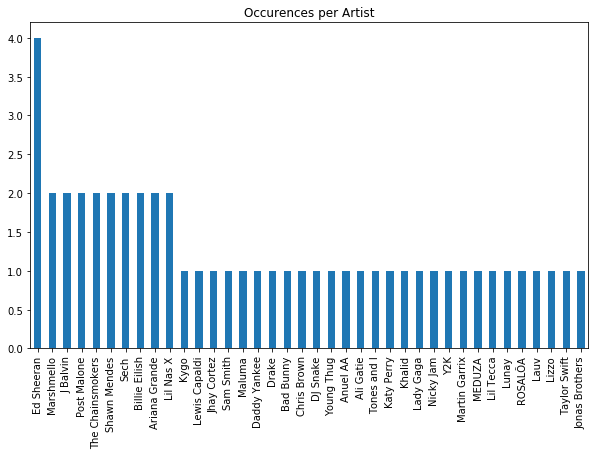

In [34]:
artist_counts = data['Artist.Name'].value_counts()
artist_counts.plot.bar(title='Occurences per Artist', figsize=(10,6))

The distribution of number of occurances per artist were relatively even. The artist with the most occurances was Ed Sheeran, who only had 4 songs. Meanwhile 9 artists had two songs, and the remaining 40 had 1 song each.

Question 2: Is there a relationship between an Artist's number of occurrences and the popularity of their most popular song?

            Popularity
Occurences            
1            87.892857
2            89.444444
4            87.000000


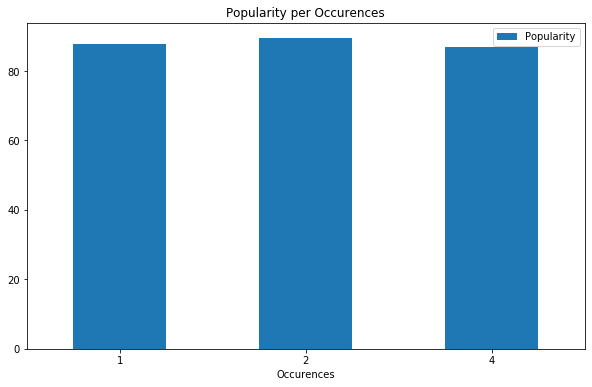

In [35]:
#Question 2
df = data
df['Occurences'] = df.groupby('Artist.Name')['Popularity'].transform('size')
df = df[['Artist.Name', 'Popularity', 'Occurences']]
df = df.groupby(['Artist.Name', 'Occurences'])['Popularity'].max().reset_index()

means = df.groupby('Occurences')['Popularity'].mean()
means = means.reset_index()
means = means.groupby('Occurences').first()
print(means)
means.plot.bar(title='Popularity per Occurences', rot=0, figsize=(10,6))

The data and shows that artists with the most occurences (4), actually had the lowest average most popular song with 87, which is less than those with least occurences (1) who had average most popular song of 87.89. The group of artists with the highest average of most popular song was those with 2 occurences, who had an average of 89.44.

Question 3: Does Genre correlate to Popularity?

In [36]:
data.sort_values(by=['Popularity'], ascending=False)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Occurences
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,2
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,2
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93,1
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92,1
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,1
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,1
36,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91,2
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91,2
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91,1
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91,1


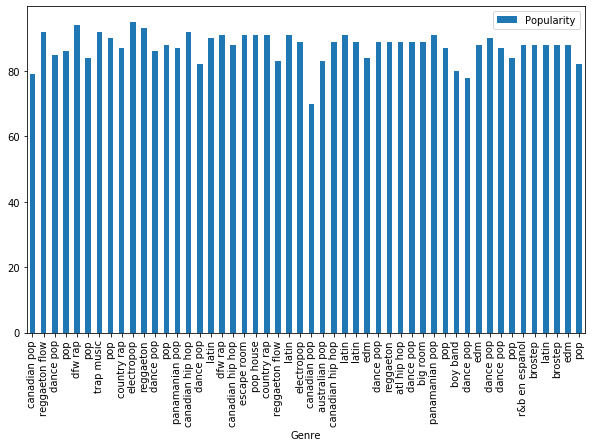

In [37]:
data.plot.bar(x='Genre', y='Popularity', figsize=(10,6))

From what this dataset shows there doesn’t seem to be a correlation between popularity and genre due to the most popular songs all being from different genres.

The solution above also gave the correlation between popularity and every other element. I can specifically use this to answer the question “Does Artist correlate to Popularity?” along with any new questions involving popularity.

Quesiton 4: Does Artist correlate to Popularity?

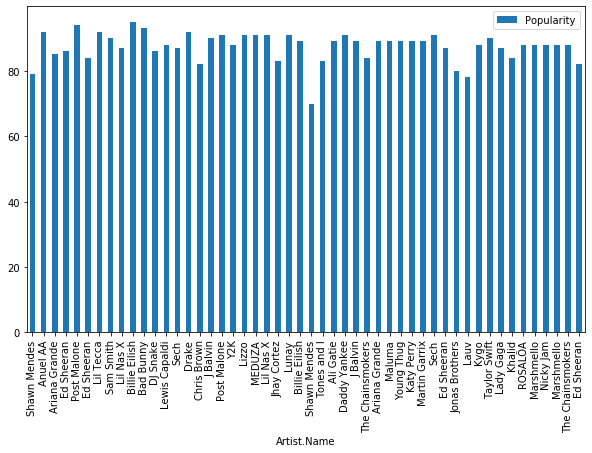

In [38]:
data.plot.bar(x='Artist.Name', y='Popularity', figsize=(10,6))

From the data show it can be concluded that certain artist are much more popular than other and that there is a correlation between certain artists and being more popular than others.

Question 5: Do more popular song tend to be shorter?

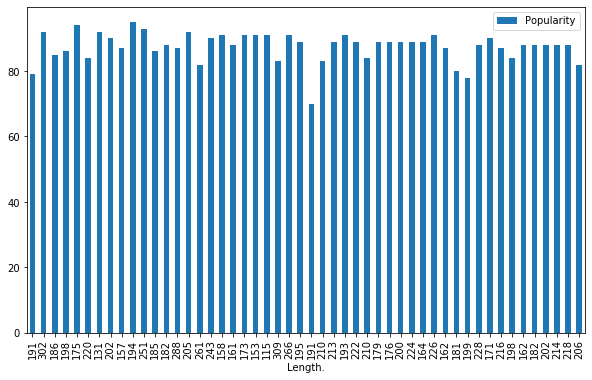

In [39]:
data.plot.bar(x='Length.', y='Popularity', figsize=(10,6))

As seen in the data, the length of the song does not contribute to the popularity of the song. The more popular songs do not follow any pattern of being shorter or longer therefore the popularity of the song does not hing on the length of the song

Question 6: Does BPM and Energy have any correlation?

In [40]:
#Gets a list of all of the different BPM
def get_data_csv():
    collection = []
    with open('top50.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data2 = get_data_csv()

def bpm():
    bpm = []
    for element in range(len(data2)):
        bpm.append(int(data2[element]['Beats.Per.Minute']))
    return bpm

#Gets a list of all of the different energy levels
def energy():
    energy = []
    for element in range(len(data2)):
        energy.append(int(data2[element]['Energy']))
    return energy

bpm_array = np.array(bpm())
energy_array = np.array(energy())

corr = np.corrcoef(bpm_array, energy_array)
corr[0, 1]

0.04375559078974287

Since the correlation coefficient between bpm and energy is apprx. 0.04, this means there is no linear relationship between bpm and energy.

Question 7: Which artist shows up the most in the data set?                                                         

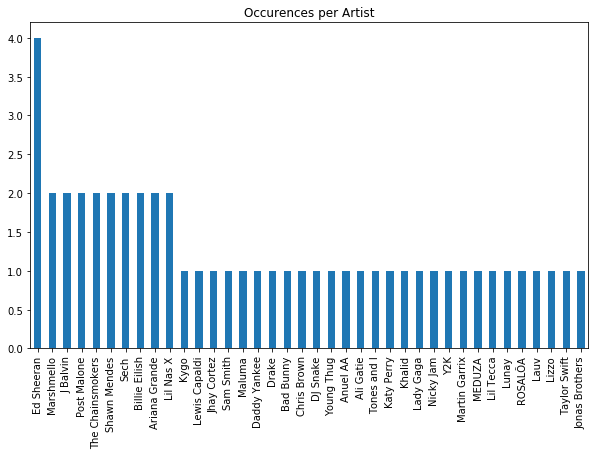

In [41]:
artist_counts.plot.bar(title='Occurences per Artist', figsize=(10,6))

As seen in the data, the artists that show up the most are Ed Sheeran with 4 songs seconded by Lil Nas X, Shawn Mendez, Marshmello, Post Malone, Sech, J Balvin, The Chainsmokers, and Billie Eilish all with two songs. The rest of the artist on the list have 1 song.

Question 8: Do certain genres tend to have a higher energy or bpm?

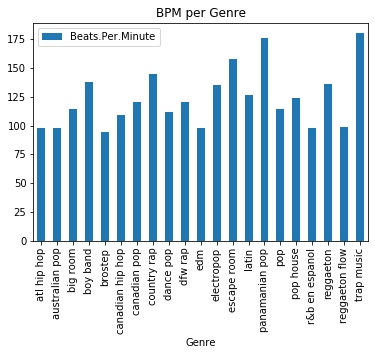

In [42]:
genre_bpm = data.groupby('Genre')['Beats.Per.Minute'].mean().reset_index()
genre_bpm = genre_bpm.groupby('Genre').first()
genre_bpm.plot.bar(title='BPM per Genre')

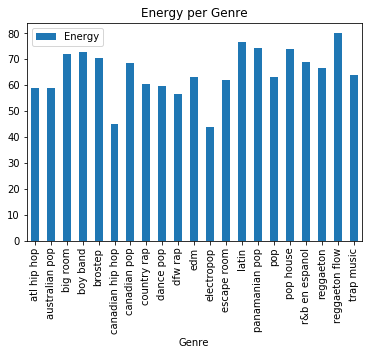

In [43]:
genre_energy = data.groupby('Genre')['Energy'].mean().reset_index()
genre_energy = genre_energy.groupby('Genre').first()
genre_energy.plot.bar(title='Energy per Genre')

It appears that both BPM and Energy differ significantly across genres. It also appears that the two do not necessarily correlate (for example reggaeton flow has very low BPM but very high Energy)

Question 9: Is there any correlation between genre and length?  

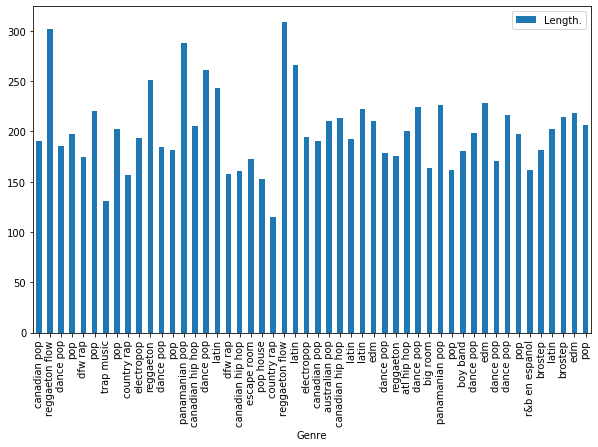

In [44]:
data.plot.bar(x='Genre', y='Length.', figsize=(10,6))

From what this dataset shows, it seems that Reggaeton Flow, Latin and Pop music all have the highest length of songs.

Question 10: Is there an even distribution of occurences per genre?

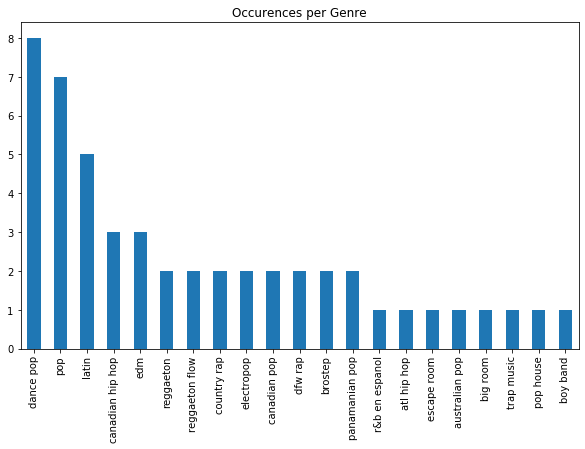

In [45]:
genre_counts = data['Genre'].value_counts()
genre_counts.plot.bar(title='Occurences per Genre', figsize=(10,6))

Dance pop, Pop and Latin are the top 3. They had 8, 7 and 5 occurrences respectively. The rest had only 3 or less. 2 genres had 3 occurrences, 8 genres have 2 occurrences and another 8 had 1 occurrence.